In [1]:
import hera_stats as hs
import matplotlib.pyplot as plt
import numpy as np

/users/drocha/Python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load container with data and peek into it
pc = hs.PSpecContainer("./uvp_jackknife.2.h5")
hs.jkset.peek(pc)

omit_ants:
   shape: (1, 37)
spl_ants:
   shape: (40, 2)
spl_gha:
   shape: (1, 10)
stripe_times:
   shape: (9, 2)


In [3]:
# Load jkset
jk = hs.JKSet(pc, "spl_ants")
jk

<hera_stats.jkset.JKSet instance at 0x7f16bcabc790>

Jackknife Data
--------------
jktype: spl_ants
data shape: (40, 2)

Group 0: [ 0 11 23 24 25 26 37 41 53 54 55 69 71 82 84 85 86 87]
Group 1: [ 1 12 13 14  2 27 36 39 40 50 51 52 65 66 67 68 70 83]


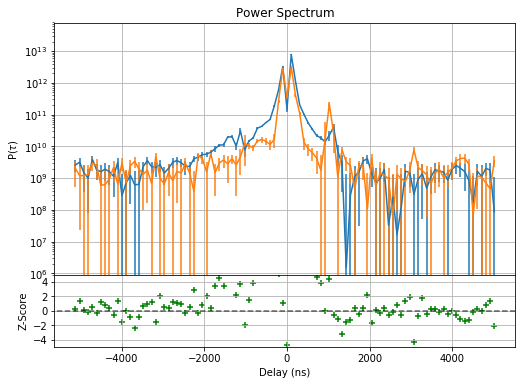

In [4]:
# Plot first jackknife group
hs.plots.plot_spectra(jk[1], method="varsum")
for i, g in enumerate(jk[1].grps):
    print "Group %i: %s" % (i, np.asarray(sorted(g), dtype=int))

Text(0.5,1,'Jackknife Data (Weighted Sum)')

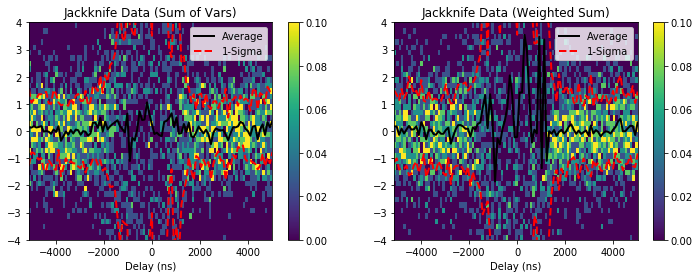

In [5]:
# Calculate zscores
zvar = hs.stats.zscores(jk, axis=1, method="varsum")
zwgt = hs.stats.zscores(jk[:, 0], method="weightedsum")

f = plt.figure(figsize=(12,4))

# Plot hist_2d using sum of variances method
ax = f.add_subplot(121)
hs.plots.hist_2d(zvar, ax=ax, logscale=False, ylim=(-4,4), normalize=True, vmax=0.1)
ax.set_title("Jackknife Data (Sum of Vars)")

# Plot hist_2d using weighted sum method
ax = f.add_subplot(122)
hs.plots.hist_2d(zwgt, ax=ax, logscale=False, ylim=(-4,4), normalize=True, vmax=0.1)
ax.set_title("Jackknife Data (Weighted Sum)")

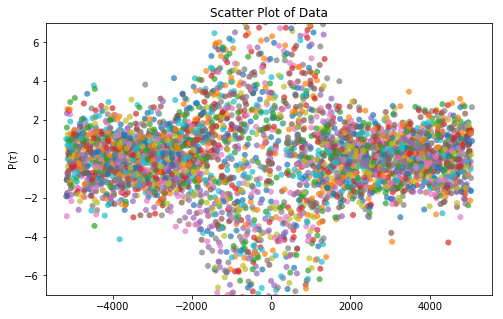

In [6]:
hs.plots.scatter(zvar, logscale=False, ylim=(-6,6))

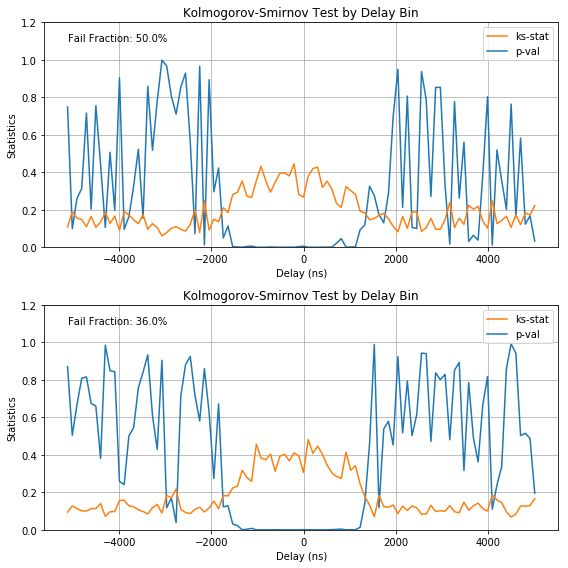

In [7]:
# KSTest using median standard deviation of zscores
f = plt.figure(figsize=(8, 8))

# Calculate median std deviation
stdev = np.std(zvar.spectra, axis=0)
med_std = np.median(stdev)

# Create cumulative distribution function
import scipy.stats as spstats
cdf = spstats.norm(0, med_std).cdf

# Plot kstest for sum of variances
ax = f.add_subplot(211)
hs.plots.plot_kstest(zvar, ax=ax, cdf=cdf)

# Plot kstest for weighted sum method
ax2 = f.add_subplot(212)
hs.plots.plot_kstest(zwgt, ax=ax2, cdf=cdf)

f.tight_layout()

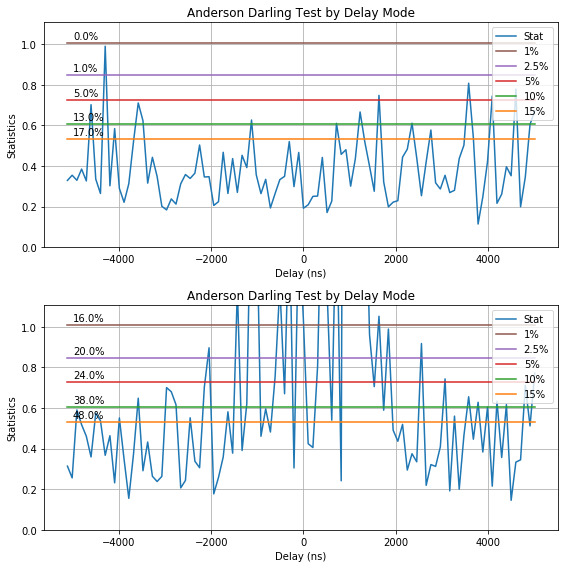

In [8]:
# Anderson test with two zscore types
f = plt.figure(figsize=(8, 8))

ax = f.add_subplot(211)
hs.plots.plot_anderson(zvar, ax=ax)

ax2 = f.add_subplot(212)
hs.plots.plot_anderson(zwgt, ax=ax2)

f.tight_layout()

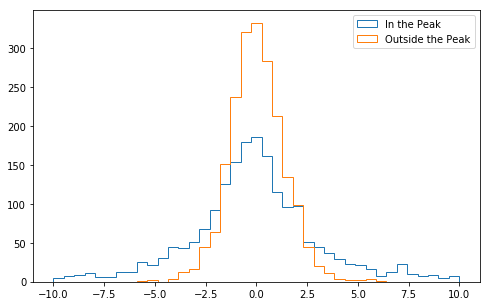

In [9]:
f = plt.figure(figsize= (8, 5))
ax = f.add_subplot(111)

# Examine zscore distribution inside and outside the peak
zs = zwgt.spectra[:, 25:75].flatten()

# Plot delay modes 25-75 (the [peak])
h1 = ax.hist(zwgt.spectra[:, 25:75].flatten(), bins=np.linspace(-10,10,40), histtype="step")

# Plot delay modes 0-25 and 75-100.
h2 = ax.hist(np.hstack([zwgt.spectra[:, :25], zwgt.spectra[:, 75:]]).flatten(), bins=np.linspace(-10,10,40), histtype="step")

ax.legend(labels = ["In the Peak", "Outside the Peak"])
pass